http://ataspinar.com/2017/05/26/classification-with-scikit-learn/

In [1]:
#This is a notebook containing the code of blogpost http://ataspinar.com/2017/05/26/classification-with-scikit-learn/
#Although I'll also give a short description in this notebook, for a full explanation you should read the blog.

from IPython.display import display, HTML

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#These Classifiers have been commented out because they take too long and do not give more accuracy as the other ones.
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.gaussian_process import GaussianProcessClassifier

In [2]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators = 18),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    #"AdaBoost": AdaBoostClassifier(),
    #"QDA": QuadraticDiscriminantAnalysis(),
    #"Gaussian Process": GaussianProcessClassifier()
}

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    
    no_classifiers = len(dict_classifiers.keys())
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score', 'test_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        Y_test_pred = classifier.predict(X_test)
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

def label_encode(df, list_columns):
    """
    This method one-hot encodes all column, specified in list_columns
    
    """
    for col in list_columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)

        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

def get_train_test(df, y_col, ratio):
    """ 
    This method transforms a dataframe into a train and test set, for this you need to specify:
    1. the ratio train : test (usually 0.7)
    2. the column with the Y_values
    """
    
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    
    Y_train = df_train[y_col].values
    Y_test = df_test[y_col].values
    del df_train[y_col]
    del df_test[y_col]

    X_train = df_train.values
    X_test = df_test.values
    return X_train, Y_train, X_test, Y_test

# 1. The glass - dataset

In [3]:
filename_glass = '../datasets/glass.csv'

In [4]:
df_glass = pd.read_csv(filename_glass)
print("This dataset has nrows, ncols: {}".format(df_glass.shape))
display(df_glass.head())

y_col = 'Type'
train_test_ratio = 0.7
X_train, Y_train, X_test, Y_test = get_train_test(df_glass, y_col, train_test_ratio)

Y = df_glass['Type'].values
X = df_glass.values

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

This dataset has nrows, ncols: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 1.2 descriptive statistics of the data in the dataset.

In [5]:
display(df_glass.describe())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 1.3 Classification

In [6]:
df_results = batch_classify(X_train, Y_train, X_test, Y_test)
display(df_results.sort_values(by='test_score', ascending=False))

trained Logistic Regression in 0.01 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.00 s
trained Gradient Boosting Classifier in 0.28 s
trained Decision Tree in 0.00 s
trained Random Forest in 0.02 s
trained Neural Net in 0.01 s
trained Naive Bayes in 0.00 s


,classifier,train_score,test_score,training_time
5,Random Forest,1.000000,0.821918,0.017554
3,Gradient Boosting Classifier,1.000000,0.780822,0.275415
1,Nearest Neighbors,0.758865,0.698630,0.001233
2,Linear SVM,0.666667,0.698630,0.003416
4,Decision Tree,1.000000,0.643836,0.000667
0,Logistic Regression,0.602837,0.602740,0.010461
7,Naive Bayes,0.560284,0.479452,0.000600
6,Neural Net,0.361702,0.342466,0.008060


# 2. Mushroom dataset (categorical data)

In [7]:
filename_mushrooms = '../datasets/mushrooms.csv'
df_mushrooms = pd.read_csv(filename_mushrooms)
display(df_mushrooms.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2.2 Displaying the contents of a dataset with categorical data

In [8]:
y_col = 'class'
x_cols = list(df_mushrooms.columns.values)
x_cols.remove('class')
for col in x_cols:
    print(col, df_mushrooms[col].unique())

#veil-type only contains one value, so we will remove that from the dataset    
del df_mushrooms['veil-type']
x_cols.remove('veil-type')

cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [10]:
#You can choose to remove rows where some column contain values like NaN, null, NULL, ?, ?? etc
#But it could also be that this value not being filled in also is information which helps with the classification

print(df_mushrooms[df_mushrooms['stalk-root'] == '?'].shape)
print(df_mushrooms.shape)
df_mushrooms2 = df_mushrooms[df_mushrooms['stalk-root'] != '?']

(2480, 22)
(8124, 22)


## 2.3 One-Hot encoding the columns with categorical data

In [11]:
to_be_encoded_cols = df_mushrooms2.columns.values
label_encode(df_mushrooms2, to_be_encoded_cols)
display(df_mushrooms2.head())

C:\Users\taspinara\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,2,5,5,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,2,5,5,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,2,5,5,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,2,5,5,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,2,5,5,0,1,0,2,0,1


## 2.4 Classifying the dataset

In [12]:
y_col = 'class'
X_train, Y_train, X_test, Y_test = get_train_test(df_mushrooms2, y_col, 0.7)

In [13]:
df_results = batch_classify(X_train, Y_train, X_test, Y_test)
display(df_results.sort_values(by='test_score', ascending=False))

trained Logistic Regression in 0.06 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 0.10 s
trained Gradient Boosting Classifier in 0.21 s
trained Decision Tree in 0.00 s
trained Random Forest in 0.03 s
trained Neural Net in 0.90 s
trained Naive Bayes in 0.00 s


,classifier,train_score,test_score,training_time
2,Linear SVM,1.000000,1.000000,0.100358
3,Gradient Boosting Classifier,1.000000,1.000000,0.214733
4,Decision Tree,1.000000,1.000000,0.002469
5,Random Forest,1.000000,1.000000,0.027350
1,Nearest Neighbors,0.999748,0.998810,0.013659
6,Neural Net,0.999495,0.998810,0.898110
0,Logistic Regression,0.964673,0.967876,0.063818
7,Naive Bayes,0.704517,0.716240,0.001712


# 3. Understanding complex datasets

## 3.1 Correlation Matrix
Some datasets contain a lot of features / columns, and it is not immediatly clear which of these features are helping with the Classification / Regression, and which of these features are only adding more noise. 

To have a better understanding of this, you could make a correlation matrix of the data, and plot all features by descending order of correlation value. 

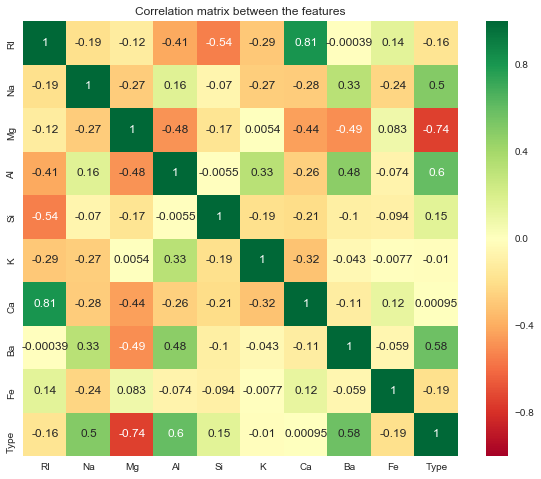

In [14]:
correlation_matrix = df_glass.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.show()

In [15]:
correlation_type = correlation_matrix['Type'].copy()
abs_correlation_type = correlation_type.apply(lambda x: abs(x))
print(abs_correlation_type.sort_values(ascending=False))

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64


## 3.2 Cumulative Explained Variance

The Cumulative explained variance shows how much of the variance is captures by the first x features. 

Below we can see that the first 4 features (i.e. the four features with the largest correlation) already capture 90% of the variance. 

If you have low accuracy values for your Regression / Classification model, you could decide to stepwise remove the features with the lowest correlation, (or stepwise add features with the highest correlation).

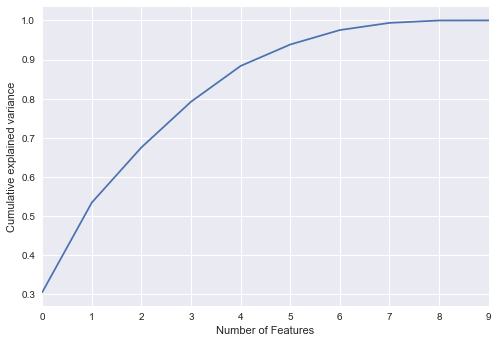

In [16]:
X_std = StandardScaler().fit_transform(X)

pca = PCA().fit(X_std)
var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,9,1)
plt.xlabel('Number of Features')
plt.ylabel('Cumulative explained variance')
plt.show()

## 3.3 Pairwise relationships between the features

In addition to the correlation matrix, you can plot the pairwise relationships between the features, to see **how** these features are correlated. 

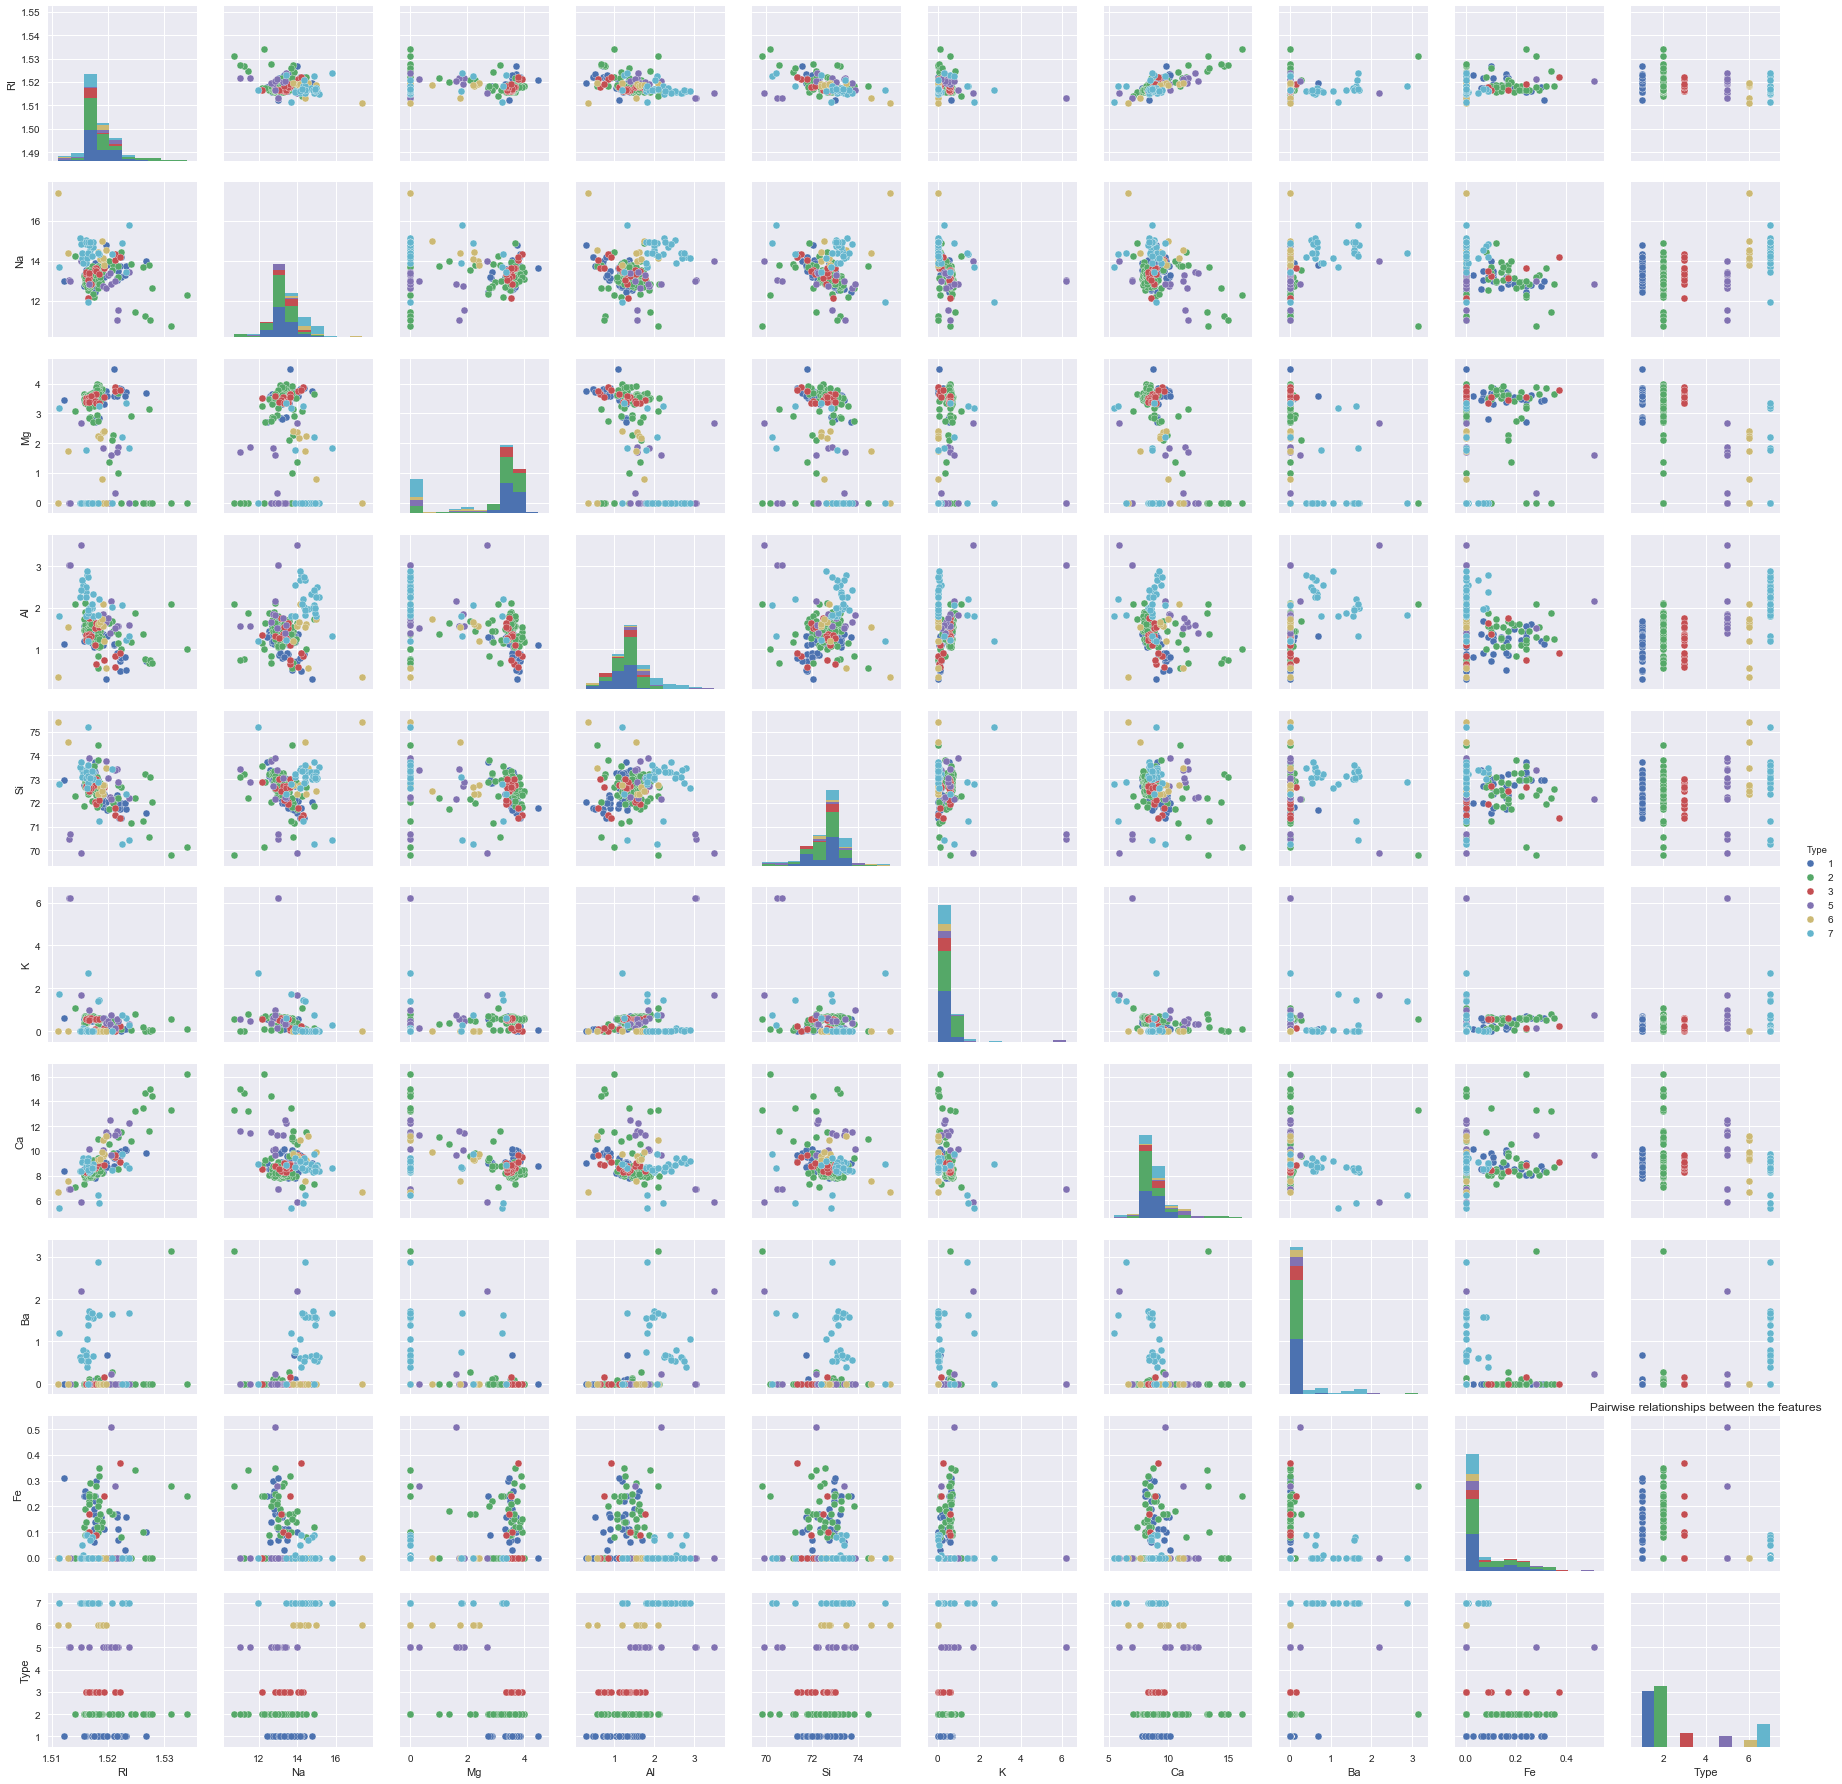

In [17]:
#plt.figure(figsize=(10,8))
ax = sns.pairplot(df_glass, hue='Type')
plt.title('Pairwise relationships between the features')
plt.show()
